<a href="https://colab.research.google.com/github/DmitrijLeontev/Dmitrij_Leontev/blob/main/DzDatascience/%D0%94%D0%9714_Lite_%D0%98%D0%BD%D1%82%D0%B5%D0%B3%D1%80%D0%B0%D1%86%D0%B8%D1%8F_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%BE%D0%B9_%D1%81%D0%B5%D1%82%D0%B8_%D0%BD%D0%B0_%D0%94%D0%95%D0%9C%D0%9E_%D0%9F%D0%90%D0%9D%D0%95%D0%9B%D0%AC_%D0%A3%D0%98%D0%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задание

Необходимо создать, обучить нейронную сеть и упаковать её в архив для загрузки на демо-панель:
* создать нейронную сеть для распознавания цифр из MNIST
* сохраните веса (модель)
* подготовить запуск модели "из коробки"
* подготовить архив с готовой нейронной сетью для загрузки в демо-панель



Ваше решение:

In [ ]:
# загрузка датасета MNIST

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Подключение утилит для to_categorical
from tensorflow.keras import utils

# Подключение библиотеки для работы с массивами
import numpy as np

# Подключение библиотек для отрисовки изображений
import matplotlib.pyplot as plt

# Подключение библиотеки для генерации случайных чисел
import random

# Подключение класса для работы с изображением
from PIL import Image

# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline

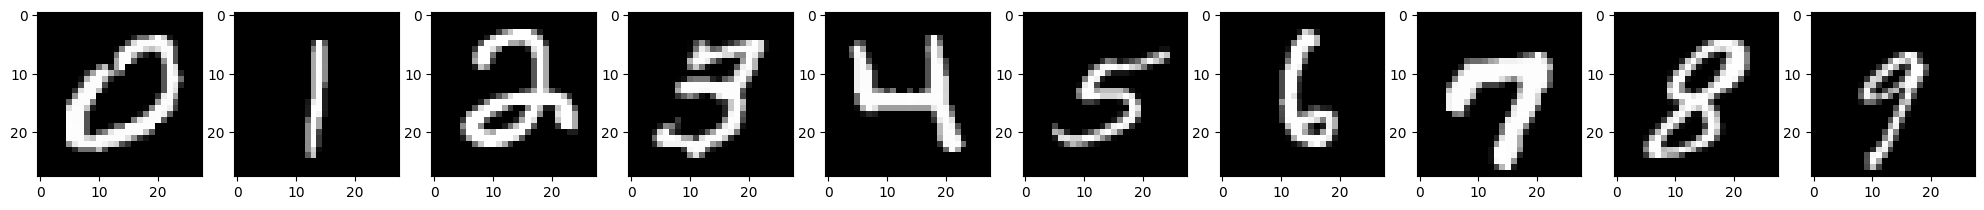

In [ ]:
# вывод изображений каждого класса для ознакомления с датасетом

fig, axs = plt.subplots(1, 10, figsize=(25,3)) # создаем полотно для 10 графиков с размером 25 на 3
for i in range(10):
  label_indexes = np.where(y_train == i)[0] # получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # выбирает случайный индекс из списка созданного выше
  img = x_train[index] # выбираем из x_train нужное положение
  axs[i].imshow(Image.fromarray(img), cmap='gray') # выводим изображение

plt.show()

In [ ]:
# добавляем размерность массиву mnist, чтобы сеть поняла что это чб
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# преобразуем выборки с ответами в OHE
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

# посмотрим форматы выборок перед обучением
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print()
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)

y_train: (60000, 10)
y_test: (10000, 10)


Ваше решение

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


In [ ]:
# import matplotlib for visualization
import matplotlib.pyplot as plt


In [ ]:
# tuning parameters
batch_size = 128
num_classes = 10
epochs = 10


Далее мы преобразуем наш набор данных из изображений, структурированных как 28 на 28 пикселей, в вектор, который имеет входные значения 784 пикселя.
Сначала мы введем размеры нашего изображения.



In [ ]:
# input image dimensions
img_rows, img_cols = 28, 28

А затем мы изменяем наши данные.

Мы также нормализуем значения пикселей из оттенков серого (от 0 до 255) в диапазон от 0 до 1. Мы делаем это, разделив каждое из них на 255:


In [ ]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'training samples')
print(x_test.shape[0], 'testing samples')


x_train shape: (60000, 28, 28, 1)
60000 training samples
10000 testing samples


Определение нашей нейронной сети

Теперь мы определим нашу модель нейронной сети, которая, как уже упоминалось, будет использовать TensorFlow в качестве бэкэнда модели.
Структура нашей архитектуры сверточной нейронной сети определена ниже:

Первый скрытый слойConv2D— это сверточный слой, который имеет 32 карты объектов, каждая размером 3 x 3, и мы используем adam 0.001 как функцию активации .
Затем мы добавляем еще один сверточный слой с 64 картами объектов.
Мы добавляем третий сверточный слой со 128 картами признаков.
Затем мы добавляем слой объединенияMaxPooling2D1который настроен с размером пула 2 x 2

Затем мы применяем слой регуляризации, используяDropoutнастроено на случайное исключение 25% нейронов в слое – это используется для уменьшения переобучения
Затем мы преобразуем двумерную матрицу в вектор, используяFlatten– это позволяет обрабатывать наши выходные данные полностью связанными слоями.
Далее мы добавляем полносвязный слой со 128 нейронами и функцией активации  
adam 0.001.

Затем мы добавим еще один слой регуляризации, чтобы уменьшить переобучение, на этот раз мы случайным образом исключаем 50% нейронов.
Мы завершаем нейронную сеть выходным слоем, имеющим 10 нейронов — столько же, сколько классов в нашей задаче классификации и функции активации softmax. Это выведет прогноз вероятности того, что цифра принадлежит каждому классу.


In [ ]:
# import TensorFlow backend
import tensorflow as tf

# define our model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation=Activation(tf.nn.softmax)))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 11, 128)       0         
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                        

In [ ]:
#Скомпилируем модель с помощью .Adam
import keras
from keras import layers

model.compile(loss=keras.losses.categorical_crossentropy,
		optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])


Обучение модели
Теперь мы подгоним модель, используя размер пакета 128 и 6 эпох.


In [ ]:
history = model.fit(x_train,  # ----------------- x_train, примеры набора данных
                           y_train,  # ----------------- y_train, метки примеров набора данных
                           validation_split=0.2,  # --- 0.2 - доля данных для валидационной (проверочной) выборки, 1-0.2=0.8 останется в обучающей
                           shuffle=True,  # ----------- перемешивание данных для равномерного обучения, соответствие экземпляра и метки сохраняется
                           batch_size=batch_size,  # ---------- размер пакета, который обрабатывает нейронка перед одним изменением весов
                           epochs=epochs,  # -------------- epochs - количество эпох обучения
                           verbose=1)  # -------------- 0 - не визуализировать ход обучения, 1 - визуализировать



Epoch 1/10
375/375 [==============================] - 335s 890ms/step - loss: 0.2229 - accuracy: 0.9332 - val_loss: 0.0559 - val_accuracy: 0.9836
Epoch 2/10
375/375 [==============================] - 338s 900ms/step - loss: 0.0833 - accuracy: 0.9756 - val_loss: 0.0426 - val_accuracy: 0.9872
Epoch 3/10
375/375 [==============================] - 329s 877ms/step - loss: 0.0603 - accuracy: 0.9822 - val_loss: 0.0420 - val_accuracy: 0.9882
Epoch 4/10
375/375 [==============================] - 329s 878ms/step - loss: 0.0495 - accuracy: 0.9849 - val_loss: 0.0412 - val_accuracy: 0.9883
Epoch 5/10
375/375 [==============================] - 328s 874ms/step - loss: 0.0387 - accuracy: 0.9883 - val_loss: 0.0354 - val_accuracy: 0.9902
Epoch 6/10
375/375 [==============================] - 330s 880ms/step - loss: 0.0337 - accuracy: 0.9893 - val_loss: 0.0357 - val_accuracy: 0.9904
Epoch 7/10
375/375 [==============================] - 353s 942ms/step - loss: 0.0297 - accuracy: 0.9912 - val_loss: 0.0318 -

В переменную history как результат метода обучения модели .fit() записалась история обучения, значения тех самых loss и accuracy на каждой эпохе обучения. Причем как для обучающей выборки, так и для проверочной.

Вы видели эти значения в распечатке по ходу обучения модели. По окончании обучения они записались в словарь history.history

Чтобы обратиться к этим данным в переменной history, используем loss, val_loss, accuracy и val_accuracy в качестве ключей словаря. Далее с помощью методов из модуля matplotlib.pyplot покажем их в виде графиков.

Смотрите:

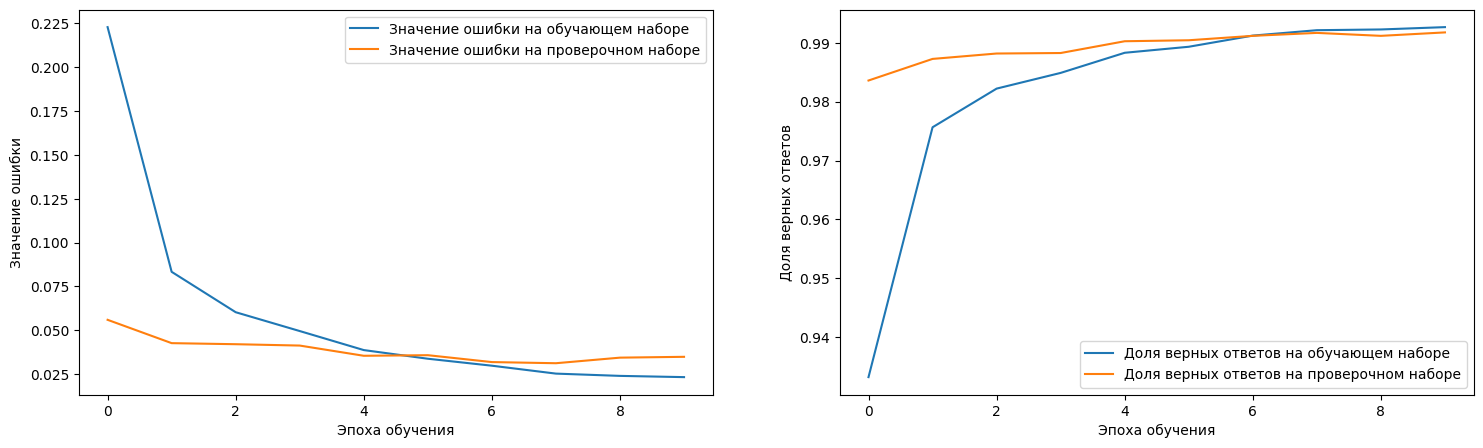

In [ ]:
# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря store_learning.history
plt.plot(history.history['loss'],
         label='Значение ошибки на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2)
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Фиксация графиков и рисование всей картинки
plt.show()

In [ ]:
# Сохранение обученной модели полностью (веса и архитектура) после всех эпох

model.save('model_fmr_all.h51')

Запуск готовой модели

Чтобы можно было воспользоваться результатами обучения нейронки, необходимо провести подготовительные работы. В этом помогут изученные ранее функции и модули.

Загрузите сохраненную модель в переменную model:

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/model_fmr_all.h51')

Подготовьте тестовую картинку для подачи в модель:

In [ ]:
# Загрузка тестовых изображений 10 классов
import tensorflow as tf

# Загружаем тестовый набор данных MNIST
mnist = tf.keras.datasets.mnist
(y_test, _), (x_test, _) = mnist.load_data()

# Сохраняем тестовые данные в файл "mnist_test.csv"
import numpy as np
np.savetxt('mnist_test.csv', x_test.reshape(x_test.shape[0], -1), delimiter=',')



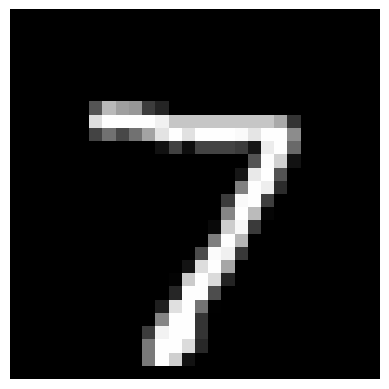

In [ ]:
# Просмотр тестового изображения
import numpy as np
import matplotlib.pyplot as plt

# Загружаем тестовый набор данных MNIST
mnist = tf.keras.datasets.mnist
(_, _), (x_test, _) = mnist.load_data()

# Выбираем первое изображение из тестового набора (можно выбрать любое другое число)
image_index = 0
image = x_test[image_index]

# Выводим изображение на экран
plt.imshow(image, cmap='gray')
plt.axis('off')  # Отключаем оси координат
plt.show()



Задайте требуемый для модели размер изображения:

In [ ]:
# Требуемый для модели размер изображения
img_width, img_height = 28, 28

Подготовьте тестовое изображение для подачи в модель.

Для наглядного расположения выводимой информации воспользуемся строковым методом .format(), задав выравнивание влево для имени класса и процентное представление вероятности принадлежности картинки к классу.

Для извлечения индексов класса применим встроенную функцию enumerate(), которая вернет не только элементы списка (имена классов), но и их индексы. Для всех классов это удобно сделать в цикле:

for i, cl in enumerate(classes):

In [ ]:
# Подготовка изображения для подачи в модель НС
import numpy as np
from PIL import Image
import tensorflow as tf


# Загрузка модели (замените эту часть кода на ваш способ загрузки модели)
model = tf.keras.models.load_model('/content/model_fmr_all.h51')

# Параметры изображения
img_width, img_height = 28, 28  # Размер изображения в наборе данных MNIST

# Выбор индекса тестового изображения для распознавания
image_index = 5

# Открытие картинки и изменение ее размера для соответствия входу модели
img = Image.fromarray(x_test[image_index]).resize((img_width, img_height))

# Проверка результата (вывод изображения)
img.show()

# Проверка результата
display(img)

# Преобразование картинки в numpy-массив чисел с плавающей запятой и нормализация значений пикселей
image = np.array(img, dtype='float64') / 255.

# добавление оси для совпадения формы входа модели; получается батч из одного примера
image = np.expand_dims(image, axis=0)

# Распознавание изображения нейронной сетью
pred = model.predict(image)

# Вывод результатов предсказания
print('Результат распознавания:')

for i in range(10):  # Для MNIST всего 10 классов
    # Вывод предсказания сети для каждого класса
    print('Класс {}: {:6.2%}'.format(i, pred[0, i]))

# Вычисление индекса класса с максимальным значением вероятности и вывод имени класса
cls_image = np.argmax(model.predict(image))
print('Изображен(а) цифра: ', cls_image)



1/1 [==============================] - 0s 130ms/step
Результат распознавания:
Класс 0:  0.00%
Класс 1: 100.00%
Класс 2:  0.00%
Класс 3:  0.00%
Класс 4:  0.00%
Класс 5:  0.00%
Класс 6:  0.00%
Класс 7:  0.00%
Класс 8:  0.00%
Класс 9:  0.00%
1/1 [==============================] - 0s 25ms/step
Изображен(а) цифра:  1


Запуск модели на демо-панели
Итак, у вас есть почти все необходимое для размещения модели нейронной сети на демо-панели. Осталась лишь пара штрихов.

Вначале создадим скрипт, который реализует распознавание изображения.

ВАЖНЫЕ МОМЕНТЫ в задании главной функции скрипта:

она должна иметь имя predict, так как сервер демо-панели будет вызывать функцию именно с таким именем;

она должна иметь первый обязательный аргумент img_path - путь к тестовому изображению на сервере демо-панели;

она должна иметь второй обязательный аргумент model_path - путь к модели на сервере демо-панели;

в скрипте должны быть импортированы все необходимые библиотеки для запуска модели, открытия и подготовки изображения.

1/1 [==============================] - 0s 78ms/step
Изображена цифра: 7


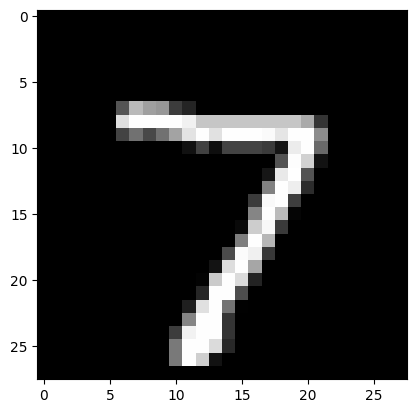

In [ ]:
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

def predict(img_index=0, model_path='/content/model_fmr_all.h51'):
    classes = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4',
               5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}

    # Загрузка модели
    model = load_model(model_path)

    # Параметры изображения
    img_width, img_height = 28, 28

    # Открытие и подготовка изображения
    img = x_test[img_index]
    image = np.array(img, dtype='float64') / 255.
    image = np.expand_dims(image, axis=0)

    # Распознавание изображения нейронной сетью
    pred = model.predict(image)
    cls_image = np.argmax(pred)

    # Вывод результата предсказания
    print('Изображена цифра:', cls_image)

    # Отображение изображения
    plt.imshow(img, cmap='gray')
    plt.show()

# Пример использования функции predict с заданным индексом изображения
predict(img_index=0)


1/1 [==============================] - 0s 78ms/step
Изображена цифра: 9


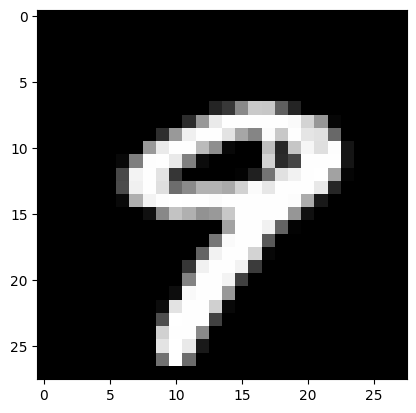

In [ ]:
# Пример использования функции predict с заданным индексом изображения
predict(img_index=9)


Теперь создадим текстовый файл с расширением .py и запишем в него созданный выше код (это и будет скрипт для демо-панели):

In [ ]:
# Сохранение кода скрипта в переменной text_code
text_code = '''
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

def predict(img_index=0, model_path='/content/model_fmr_all.h51'):
    classes = {0: 0,
               1: 1,
               2: 2,
               3: 3,
               4: 4,
               5: 5,
               6: 6,
               7: 7,
               8: 8,
               9: 9}

    # Используйте свой способ загрузки модели, например, load_model(model_path)
    # model = load_model(model_path)

    # Ваш код загрузки модели замените на эту строку
    model = load_model('/content/model_fmr_all.h51')

    # Выбор индекса тестового изображения для распознавания
    image_index = img_index

    # Открытие картинки и изменение ее размера для соответствия входу модели
    # Вместо x_test используйте свой тестовый датасет
    img = Image.fromarray(x_test[image_index]).resize((28, 28))

    # Преобразование картинки в numpy-массив чисел с плавающей запятой и нормализация значений пикселей
    image = np.array(img, dtype='float64') / 255.

    # Добавление оси для совпадения формы входа модели; получается батч из одного примера
    image = np.expand_dims(image, axis=0)

    # Распознавание изображения нейросетью
    pred = model.predict(image)

    # Вывод результатов предсказания
    print('Результат распознавания:')

    for i in range(10):  # Для MNIST всего 10 классов
        # Вывод предсказания сети для каждого класса
        print('Класс {}: {:6.2%}'.format(i, pred[0, i]))

    # Вычисление индекса класса с максимальным значением вероятности и вывод имени класса
    cls_image = np.argmax(model.predict(image))
    print('Изображена цифра: ', cls_image)
'''

# Запись содержимого переменной в файл скрипта
with open('script.py', 'w') as f:  # Создание / открытие файла
    f.write(text_code)  # Запись в файл значения переменной text_code


Следующим шагом подберем десять различных изображений, соответствующих классам датасета. Эти десять изображений будут отображаться на странице демо-панели в качестве пресетов. Загрузим их в директорию Colab под порядковыми номерами классов.

Вы можете взять абсолютно любые 10 изображений.

Здесь возьмем для этих целей файлы из тестовой папки:

In [ ]:
from tensorflow.keras.datasets import mnist
from PIL import Image
import os

# Создадим директорию, если ее еще нет
directory = '/content/test_images'
if not os.path.exists(directory):
    os.makedirs(directory)

# Загрузим набор данных MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Сохраним несколько изображений из тестового набора данных MNIST в директорию test_images
for i in range(10):
    img = Image.fromarray(x_test[i])
    img_path = os.path.join(directory, f'{i}.jpg')
    img.save(img_path)


In [ ]:
from IPython.display import Image, display

# Показать сохраненные изображения
for i in range(10):
    img_path = f'/content/test_images/{i}.jpg'
    display(Image(filename=img_path))


Следующий шаг - использовать созданный ранее скрипт для распознавания изображений MNIST и применить его к этим изображениям. Для этого мы будем использовать функцию predict из скрипта, которую мы создали ранее.

Далее создадим текстовый файл label.txt с именами классов, распознаваемых моделью. Алгоритм аналогичный: сначала создаем текстовую переменную с именами классов, затем записываем текст в файл:

In [ ]:
# Предполагаемые классы для каждого изображения MNIST
predicted_classes = [7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

# Создадим текстовую переменную с именами классов
label_txt = '''
0
1
2
3
4
5
6
7
8
9
'''

# Запишем текст в файл label.txt
with open('label.txt', 'w') as f:  # Создание / открытие файла
    f.write(label_txt.strip())     # Запись в файл значения переменной


Осталось упаковать все файлы в один архив для отправки на сервер.

Это можно сделать вручную; в ячейке ниже показано, как процесс может быть запрограммирован на Python.

Важно! Перед запуском следующей ячейки кода убедитесь, что все необходимые файлы присутствуют в каталоге /content!

сохраненная модель model_fmr_all.h51;

скрипт script.py с функцией predict();

текстовый файл label.txt с именами классов;

10 изображений.

In [ ]:
import os
from zipfile import ZipFile as Zip             # Модуль для работы с zip-архивами

# Путь к директории с изображениями
image_directory = '/content/test_images'

# Список всех файлов
integrate_files = ['model_fmr_all.h51', 'script.py', 'label.txt']  # Начнем с других файлов

# Добавляем каждое изображение в список файлов
for i in range(10):
    img_path = os.path.join(image_directory, f'{i}.jpg')  # Формируем полный путь к изображению
    if os.path.exists(img_path):  # Проверяем, существует ли файл
        integrate_files.append(img_path)  # Добавляем полный путь к изображению в список
    else:
        print(f'Файл {img_path} отсутствует!')

# Создание архива
zipArchive = Zip('/content/archive.zip', 'w')  # Открытие файла, если такого не существует - будет создан новый

# Добавление файлов в архив
for file in integrate_files:  # Для всех нужных файлов
    if os.path.exists(file):  # Если файл существует,
        zipArchive.write(file)  # то добавление его в архив
    else:
        print(f'Файл {file} отсутствует!')  # иначе вывод на экран названия отсутствующего файла

zipArchive.close()  # Закрытие архива
